Установка VK API

In [1]:
!pip install vk_api

Получаем токен на vkhost;

- выбираем vk.com

- принимаем условия

- копируем код из строки браузера (да-да, там, где написано "не копируйте")

Токен живет 1 час, он расположен между `https://oauth.vk.com/blank.html#access_token=` и `user_id=61895623`

```
https://oauth.vk.com/blank.html#access_token=ЗДЕСЬ ВАШ ТОКЕН&user_id=61895623
```

Токен привязан к вашему IP, поэтому запускаем его локально!

In [ ]:
# https://vkhost.github.io/

import vk_api

vkApiSession= vk_api.VkApi(token="Тут был мой токен")

vk = vkApiSession.get_api()

`-20629724` - ID паблика "Хабр" ВК

ID пользователей имеют вид `00000000`

ID сообществ имеют вид `-00000000`

Выгрузим 100 верхних постов и выведем результат

In [8]:
posts = vk.wall.get(owner_id=-20629724, count=1)['items']
posts

[{'inner_type': 'wall_wallpost',
  'ads_easy_promote': {'type': 2,
   'text': 'Что-то пошло не так.',
   'label_text': '',
   'button_text': '',
   'is_ad_not_easy': False},
  'is_pinned': 1,
  'comments': {'can_post': 1, 'count': 0, 'groups_can_post': True},
  'marked_as_ads': 0,
  'compact_attachments_before_cut': 0,
  'hash': 'gkKkfNZQ2GxnsmpNq5IjuS7xPKhB',
  'type': 'post',
  'push_subscription': {'is_subscribed': False},
  'attachments': [{'type': 'photo',
    'photo': {'album_id': -7,
     'date': 1734013862,
     'id': 457329654,
     'owner_id': -20629724,
     'access_key': 'f062ff4ce48961ee82',
     'post_id': 1600618,
     'sizes': [{'height': 68,
       'type': 'm',
       'width': 130,
       'url': 'https://sun9-7.userapi.com/s/v1/ig2/cFb1GdMDaR19GH0HgS7tVX-22fjAkU4ZXd1yy5fj1A6SZiD9VhUm5Coa_4C9-U_9y-Te6gP601W3fEv7O6ju3lAG.jpg?quality=96&as=32x17,48x25,72x38,108x57,160x84,240x126,360x189,480x252,540x283,640x336,720x378,1080x567,1200x630&from=bu&u=tGllxbgVlnSW1ZLZVdEe5Gk7Ms

**Задание**

1. Изучите [**документацию VK API**](https://dev.vk.com/ru/method/wall)

2. Выберите **сообщество** для скрейпинга данных

3. Произведите **парсинг** выгруженных данных:

- извлеките изображение под постом

- извлеките текст публикации

- извлеките любую статистику, например, количество просмотров

4. Сформируйте файл ***.csv**

Используйте шаблон:

-15845684

C:\Users\mrpec\AppData\Local\Temp\ipykernel_19780\1819314905.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


post IDs,views,repost
872747,43200,2020
875027,5683,10
874984,11408,16
874971,19553,38
874948,8060,5
874899,7717,3
874855,13285,208
874799,9415,4
874711,17151,102
874680,6857,8


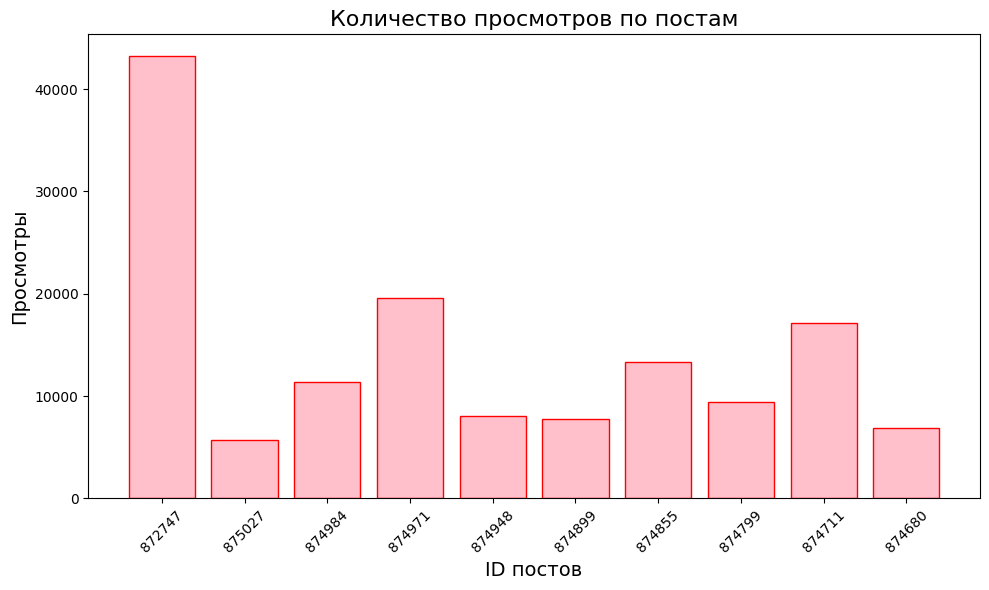

In [ ]:
import vk_api
import csv
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

def scrape_wall_data(token, owner_id, count):
    """
    Функция принимает на вход token пользователя,
    Owner_id сообщества и количество count захватываемых постов. 
    ...
    Дополните комментарии к коду, разъясняющие работу функции.
    """
    try:
        # Инициализация VK API
        vk_session = vk_api.VkApi(token=token)
        vk = vk_session.get_api()

        # Метод wall.get
        posts = vk.wall.get(owner_id=owner_id, count=count)['items']

        # Хранилище для данных
        scraped_data = []

        # Парсинг
        for post in posts:
            post_data = {
                'post_id': post['id'],
                'attachments': post['attachments'],
                'text': post['text'],
                'views': post['views'],
                'reposts': post['reposts']
            }
            scraped_data.append(post_data)

        return scraped_data

    except vk_api.exceptions.ApiError as e:
        print(f"Error accessing VK API: {e}")
        return []

# Допишите функцию для сохранения *.csv
def save_to_csv(data, file_name='vk_wall_posts.csv'):
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['post_id', 'attachments', 'text', 'views', 'reposts'])
        writer.writeheader()
        for row in data:
            writer.writerow(row)

def stats(data):
    # Напишите функцию для описания ваших данных:
    # выведите часть данных с помощью pandas
    # сделайте визуализацию собранной статистики
    stats = []
    for post in data:
        post_stats = {"post IDs": post['post_id'],
                 "views": post["views"]['count'],
                 "repost": post["reposts"]['count']}
        stats.append(post_stats)
    df = pd.DataFrame(stats)
    display(HTML(df.to_html(index=False)))
    
    x = df['post IDs'].astype(str)
    y = df['views']
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='pink', edgecolor='red')
    plt.title("Количество просмотров по постам", fontsize=16)
    plt.xlabel("ID постов", fontsize=14)
    plt.ylabel("Просмотры", fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


# Функция для выполнения задачи
def main():
    # Введите ваш токен VK API
    token = "Тут был мой токен"

    # Введите ID сообщества
    owner_id = -15845684

    # Введите количество публикаций для скрейпинга
    num_posts = 10

    # Запустите функцию для скрейпинга
    wall_data = scrape_wall_data(token, owner_id, num_posts)
    
    if wall_data:
        # Запустите функцию для сохранения *.csv
        save_to_csv(wall_data)
        stats(wall_data)

    else:
        print("No data")

if __name__ == "__main__":
    main()
